In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from glob import glob

%matplotlib inline

In [2]:
paths = ['C:/Users/mbura/Desktop/pycrewDataset/train/w',
         'C:/Users/mbura/Desktop/pycrewDataset/train/s',
         'C:/Users/mbura/Desktop/pycrewDataset/train/a',
         'C:/Users/mbura/Desktop/pycrewDataset/train/d',
         'C:/Users/mbura/Desktop/pycrewDataset/train/wa',
         'C:/Users/mbura/Desktop/pycrewDataset/train/wd',
         'C:/Users/mbura/Desktop/pycrewDataset/train/sa',
         'C:/Users/mbura/Desktop/pycrewDataset/train/sd',
         'C:/Users/mbura/Desktop/pycrewDataset/train/nk']

In [3]:
map_labels = {  "w"  : [1,0,0,0],
                "s"  : [0,1,0,0],
                "a"  : [0,0,1,0],
                "d"  : [0,0,0,1],
                "wa" : [1,0,1,0],
                "wd" : [1,0,0,1],
                "sa" : [0,1,1,0],
                "sd" : [0,1,0,1],
                "nk" : [0,1,0,0]}  ## i mapped nokey to brake key

In [4]:
img_paths = []
classes = []
for path in paths:
    cdir = path + "/" + "*"
    class_name = path.split("/")[-1]
    print(cdir)
    for files in glob(cdir):
        img_paths.append(files.replace("\\", "/"))
        classes.append(class_name)

C:/Users/mbura/Desktop/pycrewDataset/train/w/*
C:/Users/mbura/Desktop/pycrewDataset/train/s/*
C:/Users/mbura/Desktop/pycrewDataset/train/a/*
C:/Users/mbura/Desktop/pycrewDataset/train/d/*
C:/Users/mbura/Desktop/pycrewDataset/train/wa/*
C:/Users/mbura/Desktop/pycrewDataset/train/wd/*
C:/Users/mbura/Desktop/pycrewDataset/train/sa/*
C:/Users/mbura/Desktop/pycrewDataset/train/sd/*
C:/Users/mbura/Desktop/pycrewDataset/train/nk/*


In [5]:
len(img_paths), len(classes)

(132913, 132913)

In [6]:
df = pd.DataFrame(img_paths, columns = ["filename"])

In [7]:
df.shape

(132913, 1)

In [8]:
df.head()

,filename
0,C:/Users/mbura/Desktop/pycrewDataset/train/w/1...
1,C:/Users/mbura/Desktop/pycrewDataset/train/w/1...
2,C:/Users/mbura/Desktop/pycrewDataset/train/w/1...
3,C:/Users/mbura/Desktop/pycrewDataset/train/w/1...
4,C:/Users/mbura/Desktop/pycrewDataset/train/w/1...


In [9]:
df["label"] = df.filename.apply(lambda x: x.split("/")[-2])
df["name"] = df.filename.apply(lambda x: map_labels[x.split("/")[-2]])

In [10]:
for idx, label in enumerate(["w", "s", "a", "d"]):
    df[label] = df.name.apply(lambda x: x[idx])

In [11]:
labels = [path.split("/")[-1] for path in paths]

In [12]:
df.set_index("filename", inplace = True)

Text(0, 0.5, 'Frequency')

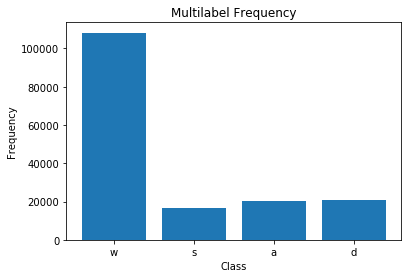

In [13]:
plt.bar(["w", "s", "a", "d"], df[df.columns[-4:]].sum().values)
plt.title('Multilabel Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')

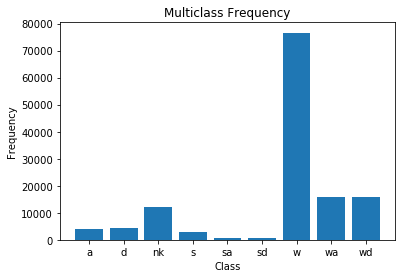

In [14]:
unique, counts = np.unique(sorted(df.label), return_counts=True)
plt.bar(unique, counts)

plt.title('Multiclass Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')

plt.show()

In [15]:
del df["label"], df["name"]

In [16]:
df.shape

(132913, 4)

In [17]:
df.to_csv("train.csv")